# Diabetes Dataset:
    1- EDA
    2- Graphical and Statistical Analysis
    3- Outlier Trimming
    4- Feature Engineering
    5- Model Building : Logistic Regression

### Link to dataset: "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

### Importing Required Libraries

In [55]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Checking missing Values

In [7]:
df.isnull().sum()   # no null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.duplicated().sum()   # No Duplicate values

0

In [9]:
for feature in df.columns:
    print("{} has {} unique values".format(feature,df[feature].nunique()))

Pregnancies has 17 unique values
Glucose has 136 unique values
BloodPressure has 47 unique values
SkinThickness has 51 unique values
Insulin has 186 unique values
BMI has 248 unique values
DiabetesPedigreeFunction has 517 unique values
Age has 52 unique values
Outcome has 2 unique values


In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

### Graphical Analysis

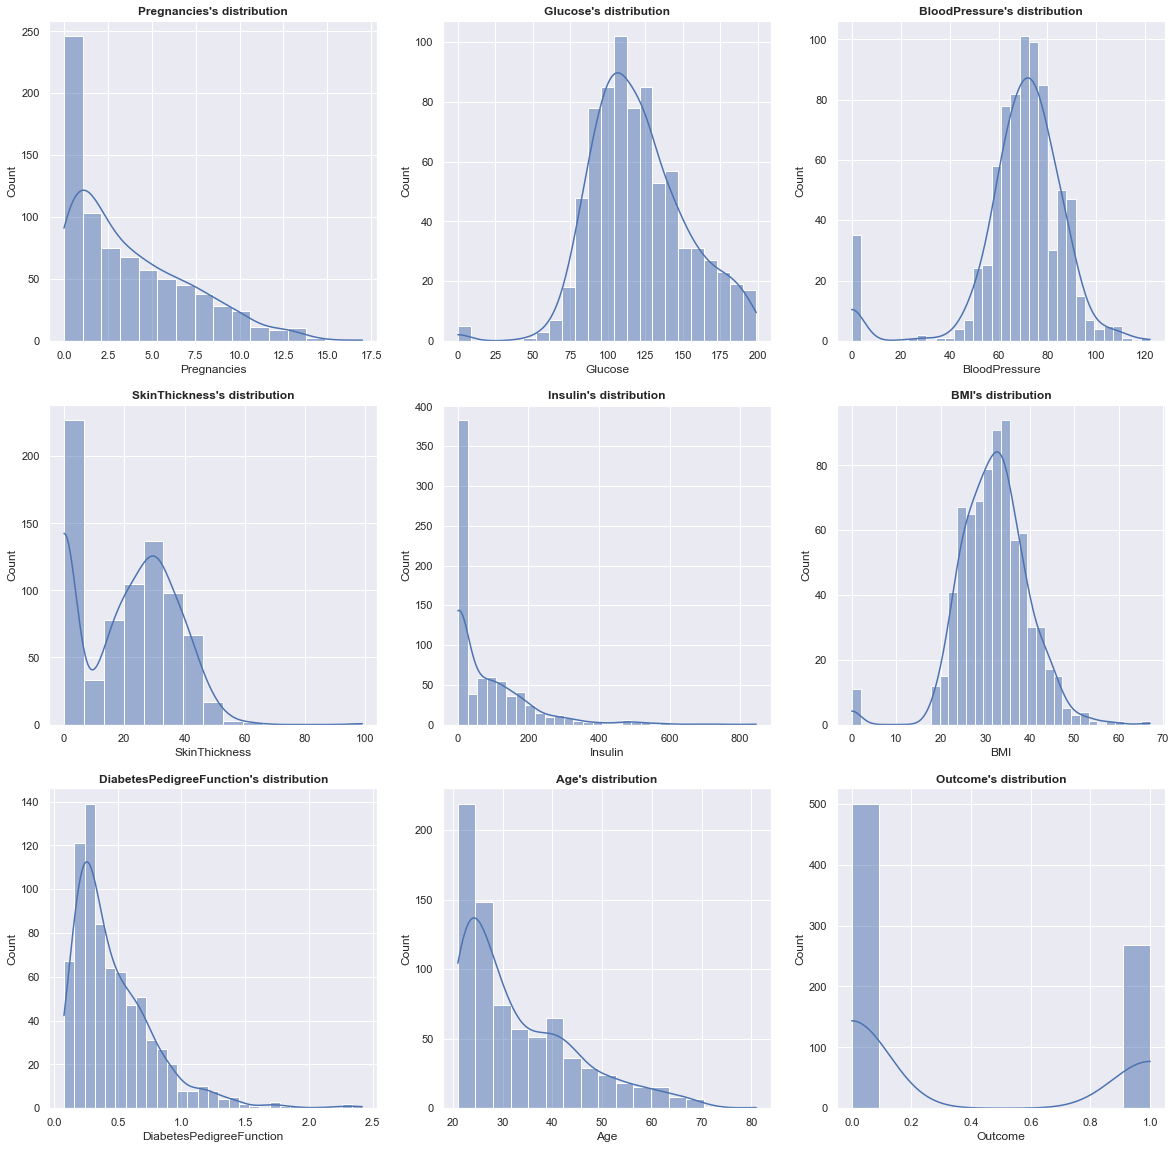

In [12]:
plt.figure(figsize=(20,20))
for i in enumerate(df.columns):
    sns.set(style='darkgrid')
    plt.subplot(3,3,i[0]+1)
    sns.histplot(data=df,x=i[1],kde=True)
    plt.title("{}'s distribution".format(i[1]),fontweight="bold")

### Observation:
    1- No probable logical correlation i.e. no feature can be dropped in feature selection
    2- Features like Pregnancies, Insulin, DiabetesPedigreeFunction are Right-Skewed of distribution.
    3- Features like BloodPressure, BMI,  are Left-Skewed of distribution.

#### There are lot of 0 values , we will try to replace it

In [13]:
df_copy= df.copy()
df_copy.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [14]:
for i in df_copy.columns:
    if 0 in df_copy[i].value_counts():
        print(i,'have',df_copy[i].value_counts()[0],'values as 0')

Pregnancies have 111 values as 0
Glucose have 5 values as 0
BloodPressure have 35 values as 0
SkinThickness have 227 values as 0
Insulin have 374 values as 0
BMI have 11 values as 0
Outcome have 500 values as 0


#### Replacing 0 value with 'Mean' as there is less impact with median

In [15]:
# We don't need to replace 0 value in pregnancies and outcome 
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
    df_copy[i] = df_copy[i].replace(0,df_copy[i].mean())

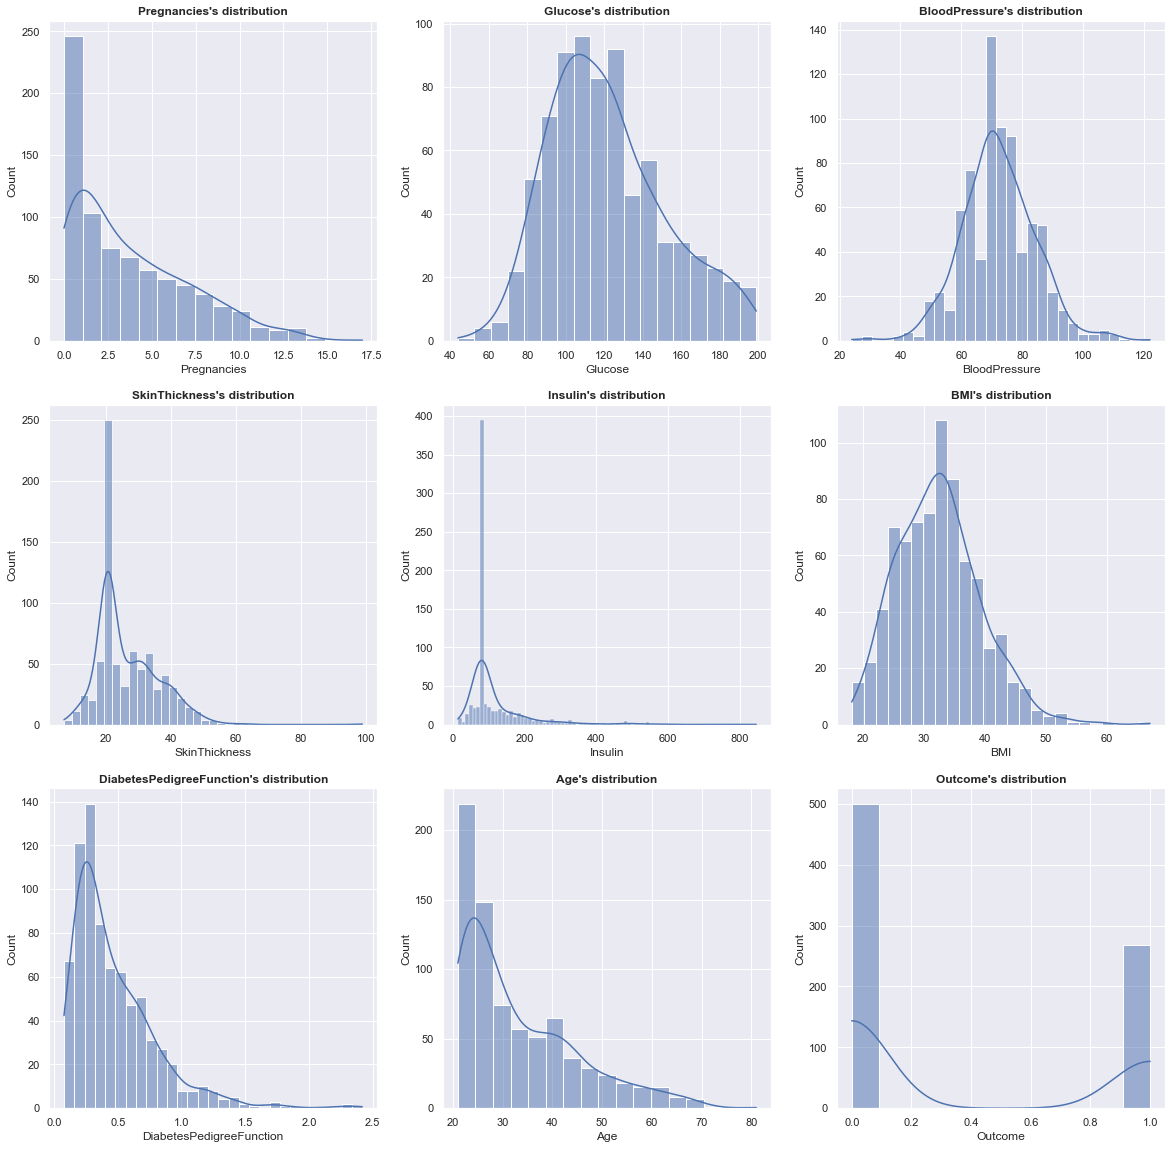

In [16]:
plt.figure(figsize=(20,20))
for i in enumerate(df_copy.columns):
    sns.set(style='darkgrid')
    plt.subplot(3,3,i[0]+1)
    sns.histplot(data=df_copy,x=i[1],kde=True)
    plt.title("{}'s distribution".format(i[1]),fontweight="bold")

### Observation:
    After replacing 0 values with mean , distribution improved 

In [17]:
df_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='BloodPressure', ylabel='Age'>

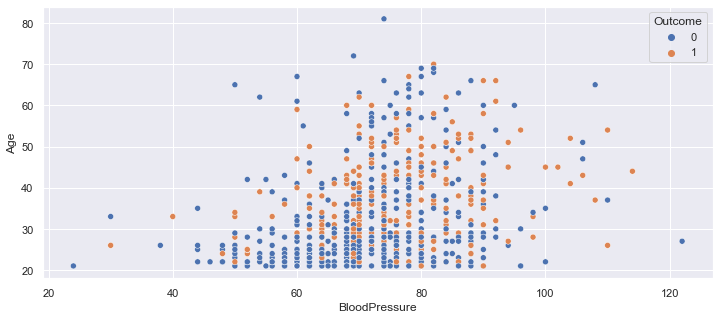

In [18]:
plt.figure(figsize=(12,5))
sns.scatterplot(df_copy['BloodPressure'],df_copy['Age'],hue=df_copy['Outcome'])

### Observation:
    1- After plotting all scatter plot , There is linear relationship among any features.
    2- Mostly are normally distributed.

<AxesSubplot:>

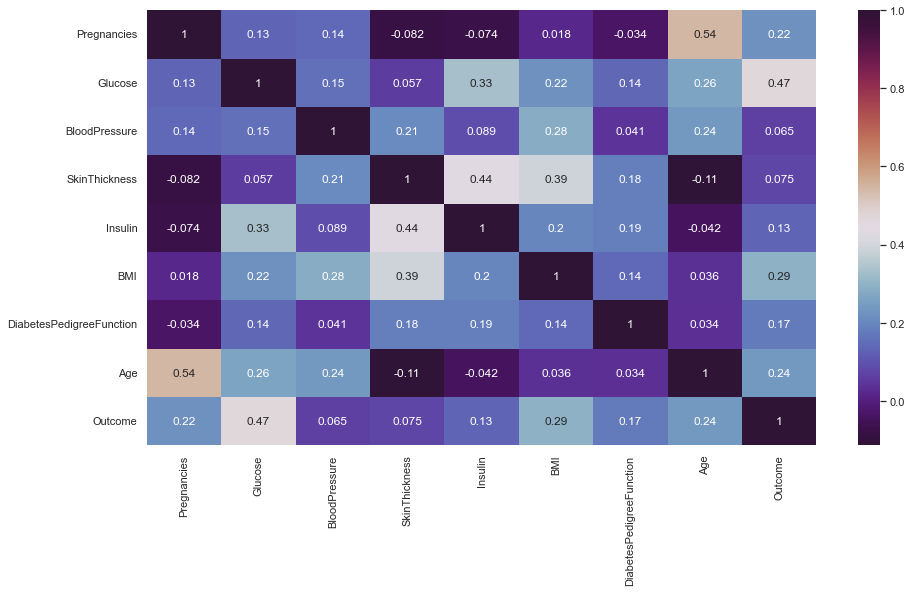

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='twilight_shifted')

### Checking Outliers

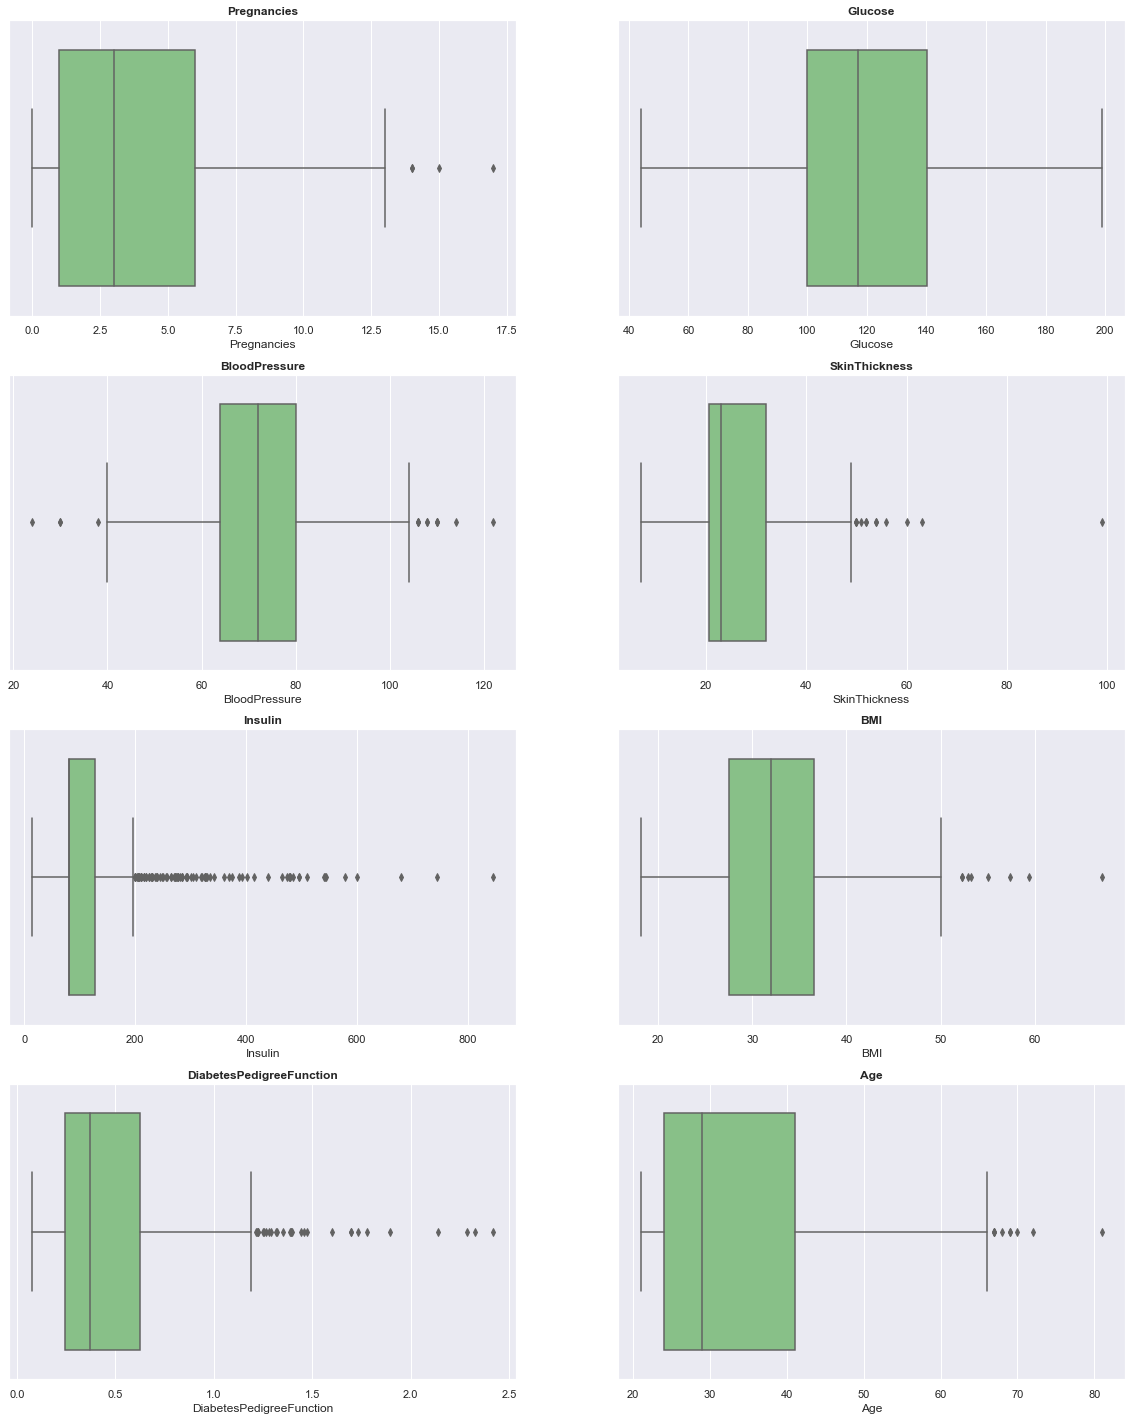

In [20]:
plt.figure(figsize=(20,25))
for i in enumerate([i for i in df_copy.columns if i!='Outcome']):
    sns.set(style='darkgrid')
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data=df_copy,x=i[1],palette='Accent')
    plt.title("{}".format(i[1]),fontweight="bold")

## Observation:
    1- Glucose has no outliers.
    2- BloodPressure has outliers on both sides.
    3- Rest all the features have outliers on upper quantile.
    4- Insulin and DiabetesPedigreeFunction have many Outliers..

## Treating Outliers

In [21]:
def outlier_threshold(df,variable):
    """Function to find threshold"""
    q1=df[variable].quantile(0.25)
    q3=df[variable].quantile(0.75)
    IQR = q3 - q1
    up_limit = q3+(1.5*IQR)
    lower_limit = q1-(1.5*IQR)
    return lower_limit,up_limit

In [22]:
for variable in enumerate([i for i in df_copy.columns if i!='Outcome']):
    low_limit,upper_limit=outlier_threshold(df_copy,variable[1])
    print(variable[1],':',low_limit,upper_limit)

Pregnancies : -6.5 13.5
Glucose : 39.0 201.0
BloodPressure : 40.0 104.0
SkinThickness : 3.341145833333332 49.1953125
Insulin : 8.623697916666671 198.42578125
BMI : 13.849999999999998 50.25
DiabetesPedigreeFunction : -0.32999999999999996 1.2
Age : -1.5 66.5


### Replacing outliers values wiht threshold value i.e. CAPPING

In [23]:
def replace_with_threshold(df,col):
    for variable in col:
        low_limit,upper_limit=outlier_threshold(df,variable)
        df.loc[df[variable]<low_limit,variable]=low_limit
        df.loc[df[variable]>upper_limit,variable]=upper_limit

replace_with_threshold(df_copy,df_copy.columns)

### Rechecking the outliers again

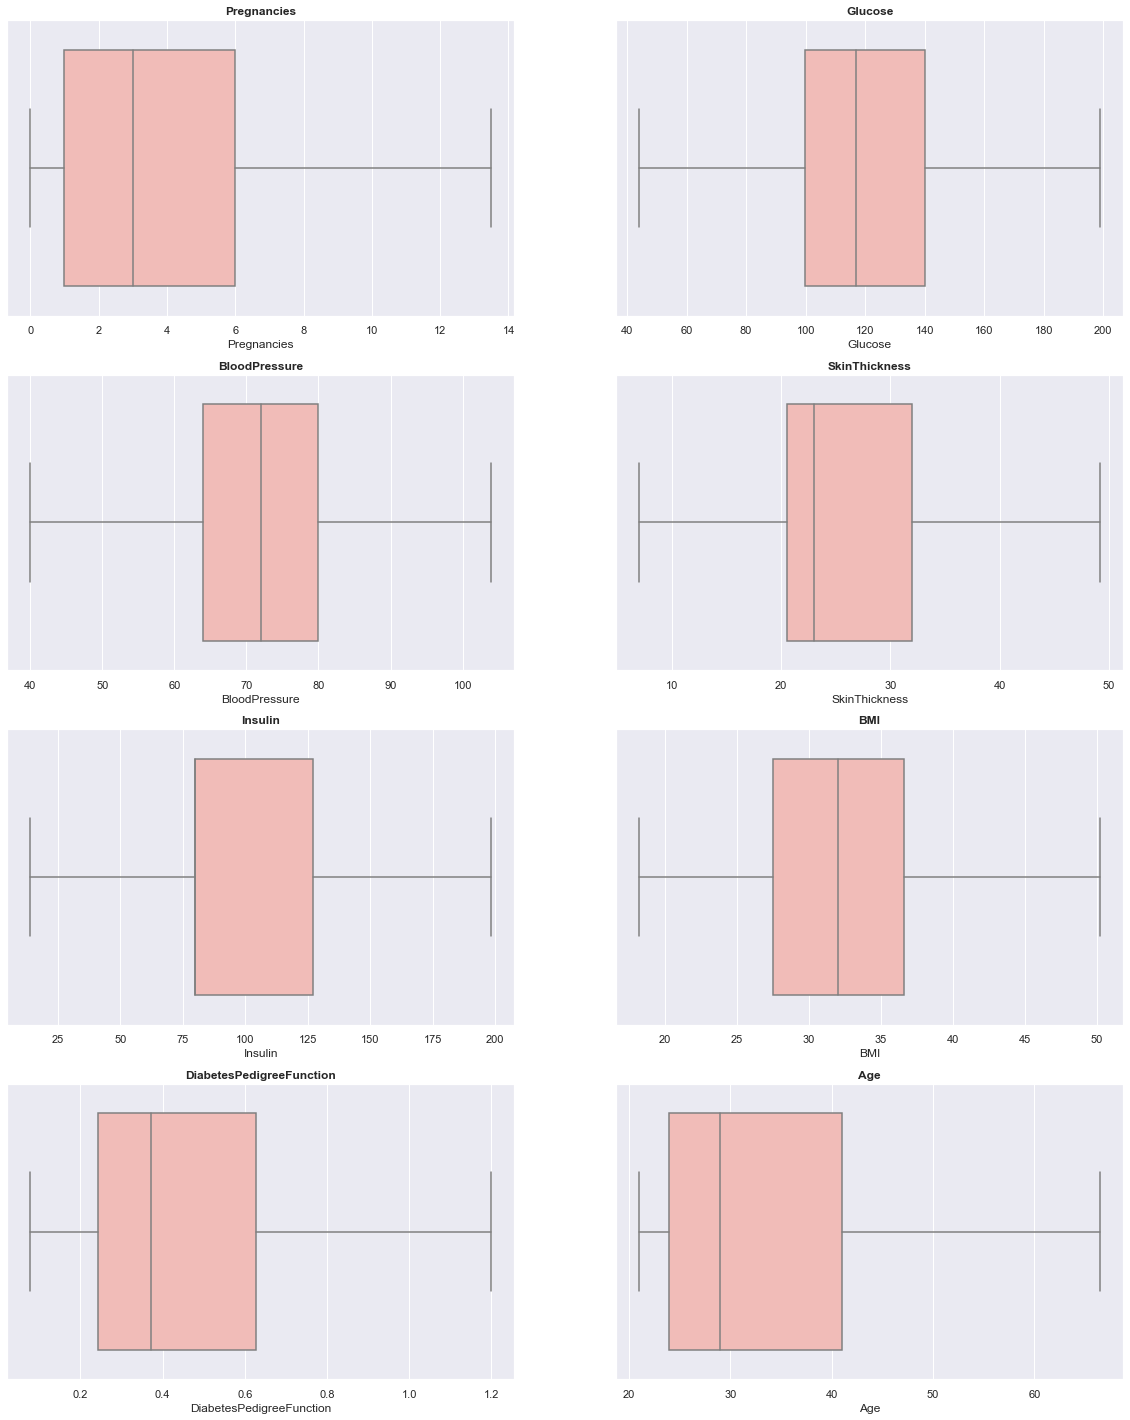

In [24]:
plt.figure(figsize=(20,25))
for i in enumerate([i for i in df_copy.columns if i!='Outcome']):
    sns.set(style='darkgrid')
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data=df_copy,x=i[1],palette='Pastel1')
    plt.title("{}".format(i[1]),fontweight="bold")

In [25]:
df_copy.shape

(768, 9)

### Rechecking Distribution

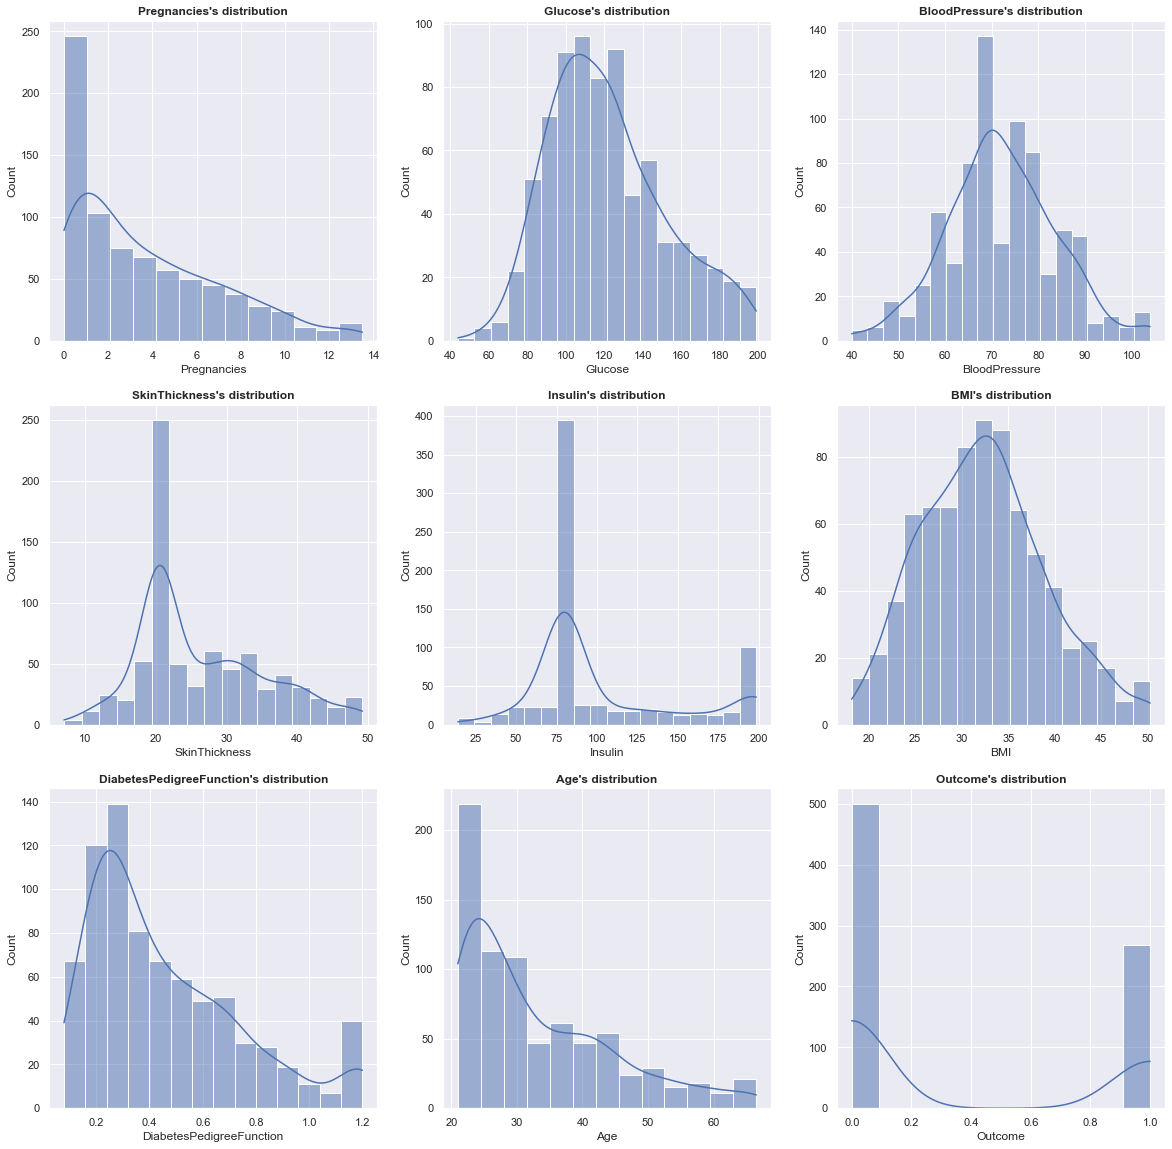

In [26]:
plt.figure(figsize=(20,20))
for i in enumerate(df_copy.columns):
    sns.set(style='darkgrid')
    plt.subplot(3,3,i[0]+1)
    sns.histplot(data=df_copy,x=i[1],kde=True)
    plt.title("{}'s distribution".format(i[1]),fontweight="bold")

### Observation:
    1- Outliers are handled but distribution is slightly changed towards right side.

## Model Building

In [27]:
# Differenciating Independent and dependent variable

In [28]:
X = df_copy.iloc[:,:-1]
y = df_copy.iloc[:,-1]

In [29]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0


In [30]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

### Split dataframe in train and test data:

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2.0,84.0,69.105469,20.536458,79.799479,31.992578,0.304,21.0
618,9.0,112.0,82.000000,24.000000,79.799479,28.200000,1.200,50.0
346,1.0,139.0,46.000000,19.000000,83.000000,28.700000,0.654,22.0
294,0.0,161.0,50.000000,20.536458,79.799479,21.900000,0.254,65.0
231,6.0,134.0,80.000000,37.000000,198.425781,46.200000,0.238,46.0


In [33]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6.0,98.0,58.0,33.000000,190.000000,34.0,0.430,43.0
324,2.0,112.0,75.0,32.000000,79.799479,35.7,0.148,21.0
624,2.0,108.0,64.0,20.536458,79.799479,30.8,0.158,21.0
690,8.0,107.0,80.0,20.536458,79.799479,24.6,0.856,34.0
473,7.0,136.0,90.0,20.536458,79.799479,29.9,0.210,50.0


In [34]:
y_train.head()

60     0.0
618    1.0
346    0.0
294    0.0
231    1.0
Name: Outcome, dtype: float64

## Scaling the dataset

scaler = StandardScaler()
scaler

In [35]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler

MaxAbsScaler()

In [36]:
X_train_scaled = scaler.fit_transform(X_train)

In [37]:
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled

array([[0.14814815, 0.42211055, 0.66447566, ..., 0.63666822, 0.25333333,
        0.31578947],
       [0.66666667, 0.56281407, 0.78846154, ..., 0.56119403, 1.        ,
        0.7518797 ],
       [0.07407407, 0.69849246, 0.44230769, ..., 0.57114428, 0.545     ,
        0.33082707],
       ...,
       [0.74074074, 0.50753769, 0.82692308, ..., 0.90746269, 0.94666667,
        0.57142857],
       [0.        , 0.70854271, 0.66447566, ..., 0.84378109, 0.17083333,
        0.43609023],
       [0.        , 0.6281407 , 0.92307692, ..., 0.44776119, 0.21833333,
        0.31578947]])

## Model Selection

### Logistic Regression

In [39]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [40]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [41]:
# prediction
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.])

# Performance Matrix

### Accuracy Score

In [42]:
accuracy=round(accuracy_score(y_test, log_reg_pred),4)
accuracy

0.7792

In [51]:
accuracy_manual = round((true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative),4)
accuracy_manual

0.7792

### Confusion Matrix

In [43]:
confusion_mat=confusion_matrix(y_test, log_reg_pred)
confusion_mat

array([[86, 13],
       [21, 34]], dtype=int64)

In [44]:
true_positive=confusion_mat[0][0]
false_positive=confusion_mat[0][1]
false_negative=confusion_mat[1][0]
true_negative=confusion_mat[1][1]

### Precision Score

In [54]:
precision_score_manual = round(true_positive/(true_positive+false_positive),4)
precision_score_manual

0.8687

### Recall

In [59]:
recall_score_manual = round(true_positive/(true_positive+false_negative),4)
recall_score_manual

0.8037

### F-1 Score or F-Beta Score

In [61]:
f1_score = 2*((precision_score_manual*recall_score_manual)/(precision_score_manual+recall_score_manual))
f1_score

0.8349368452523319

### Classification Report

In [71]:
classification_rep = classification_report(y_test, log_reg_pred)
print(classification_rep)

              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83        99
         1.0       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

